In [2]:
import mglearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


**Data Visualization to determine the appropraite ML algorithm**

C:\Users\AKANLEGUM\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\AKANLEGUM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


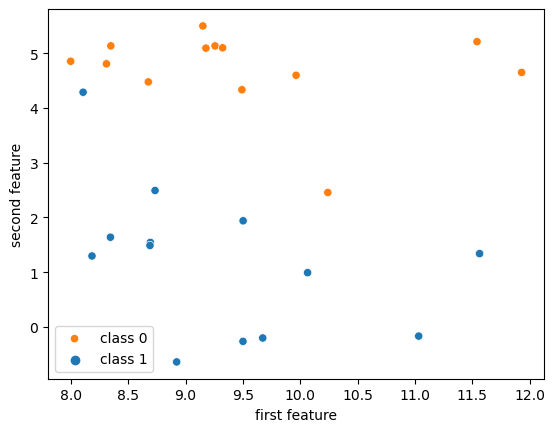

In [3]:
X,y = mglearn.datasets.make_forge();
sns.scatterplot(X[:,0],X[:,1],hue=y,  );
plt.legend(['class 0', 'class 1']);
plt.xlabel('first feature');
plt.ylabel('second feature');

**Spliting of datasets into train and test** 

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

**Ploting different graphs with different n_neighbors in order to choose the most appropraite one**

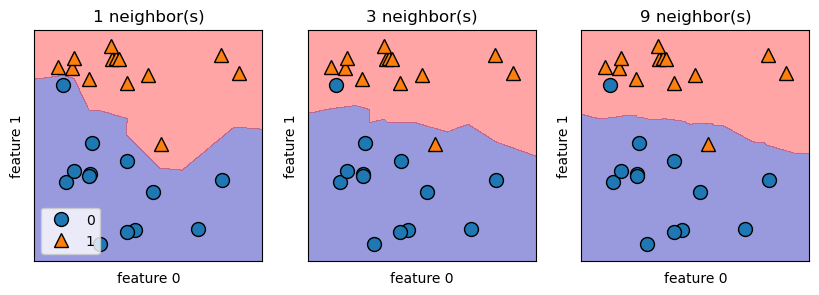

In [5]:
from sklearn.neighbors import KNeighborsClassifier

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbor, ax in zip([1,3,9],axes):
    knn = KNeighborsClassifier(n_neighbors=n_neighbor)
    knn.fit(X,y)
    mglearn.plots.plot_2d_separator(knn, X, fill=True, eps=0.5, ax=ax, alpha=.4);
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax);
    ax.set_title(f"{n_neighbor} neighbor(s)");
    ax.set_xlabel("feature 0");
    ax.set_ylabel("feature 1");
axes[0].legend(loc=3);

# It is seen that the best n_neighbor is 1


**Plotting several n_neighbors to figure out the most appropraite one.**

C:\Users\AKANLEGUM\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\AKANLEGUM\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

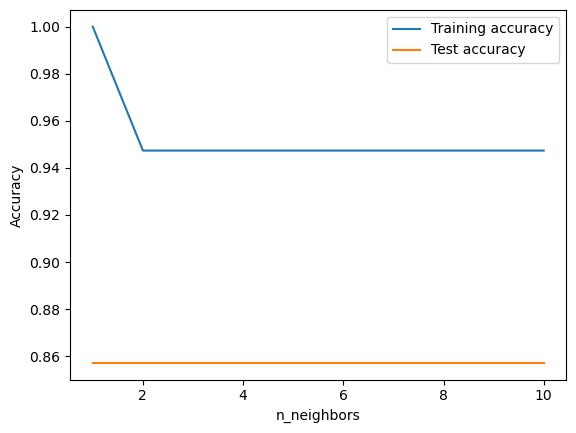

In [6]:

training_accuracy = []
test_accuracy = []

neighbors_settings = np.arange(1,11)

for n_neighbor in neighbors_settings:
    # Build a model
    knn = KNeighborsClassifier(n_neighbors= n_neighbor)
    knn.fit(X_train,y_train)
    training_score = knn.score(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    training_accuracy.append(training_score)
    test_accuracy.append(test_score)
    
    
plt.plot(neighbors_settings,training_accuracy, label='Training accuracy');
plt.plot(neighbors_settings,test_accuracy, label='Test accuracy');
plt.xlabel('n_neighbors');
plt.ylabel('Accuracy');
plt.legend();

In [7]:
print(knn.score(X_test,y_test))

0.8571428571428571


C:\Users\AKANLEGUM\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
